# Steps to build a Neural Network on FashionMNIST

In [24]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

In [17]:
# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load data
data_directory = "D:/book-implementations/packt-modern-computer-vision-with-pytorch/3-building-deep-nn-with-pytorch/images/FMNIST"
fmnist = datasets.FashionMNIST(
    data_directory,
    download=False,
    train=True
    )

tr_images = fmnist.data
tr_targets = fmnist.targets

In [18]:
# Dataset

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1, 28*28)

        self.x = x
        self.y = y 

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        return x.to(device), y.to(device)

In [19]:
# Dataloader

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    train_dl = DataLoader(
        train,
        batch_size=32,
        shuffle=True
    )
    return train_dl

In [21]:
# Model

def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(
        model.parameters(), 
        lr = 1e-2
        )

    return model, loss_fn, optimizer

In [22]:
# Training Function

def train_batch(x, y, model, loss_fn, optimizer):
    model.train()
    predictions = model(x)
    batch_loss = loss_fn(predictions, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item() 

# Accuracy
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    predictions = model(x)
    max_values, argmax = predictions.max(-1)
    is_correct = argmax == y
    return is_correct.cpu().numpy().tolist()

In [26]:
# Initialise model, loss, optimizer, dataloader
model, loss_fn, optimizer = get_model()
train_dl = get_data()

losses, accuracies = [], []

for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []

    for index, batch in enumerate(iter(train_dl)):
        x, y = batch 
        batch_loss = train_batch(
            x, 
            y, 
            model,
            loss_fn,
            optimizer 
            )

        epoch_losses.append(batch_loss)

    epoch_loss = np.array(epoch_losses).mean()

    for index, batch in enumerate(iter(train_dl)):
        x, y = batch 
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    
    epoch_accuracy = np.mean(epoch_accuracies)

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


C:\Users\hp\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


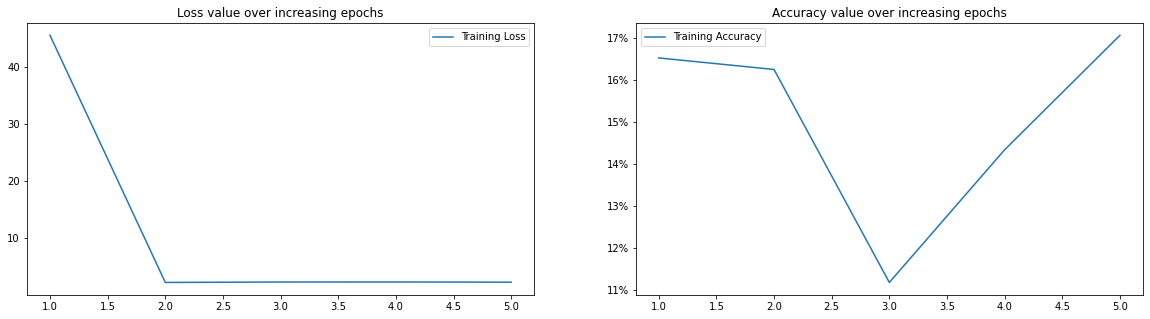

In [27]:
epochs = np.arange(5)+1

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()

plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()